# 030.Decision Tree

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**위 feature 를 모두 가지고 Decision Tree 알고리즘을 이용하여 꽃의 종류 분류**

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
iris.data.shape

(150, 4)

In [3]:
iris.feature_names, iris.target_names
# 4개의 피처, 정답 레이블 1

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

### train / test split & accuracy check

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [7]:
tree.DecisionTreeClassifier?
# criterion = 'gini' 이면 cart 알고리즘을 돌리게 됨.
# max_depth는 나무를 얼마나 깊이 내려갈 것인지
# 한 없이 깊이 내려가면 오버 피팅이 일어남. 새로운 데이터엔 잘 못 맞춤.
# random_state 를 주면 똑같은 나무가 많들어짐.

Init signature:
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default

In [9]:
clf = tree.DecisionTreeClassifier(max_depth = 2 , criterion = "entropy") 
# entropy로 적용하면 ID3 알고리즘으로 적용이 되는거임.
clf.fit(X_train, y_train) # 훈련 데이터용 피처(X_train), 라벨(y_train)으로 모델 훈련을 진행해야함.!!

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [10]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [12]:
accuracy_score(y_test, y_pred)
# 91.11% 맞췄음

0.9111111111111111

## visualization with matplotlib

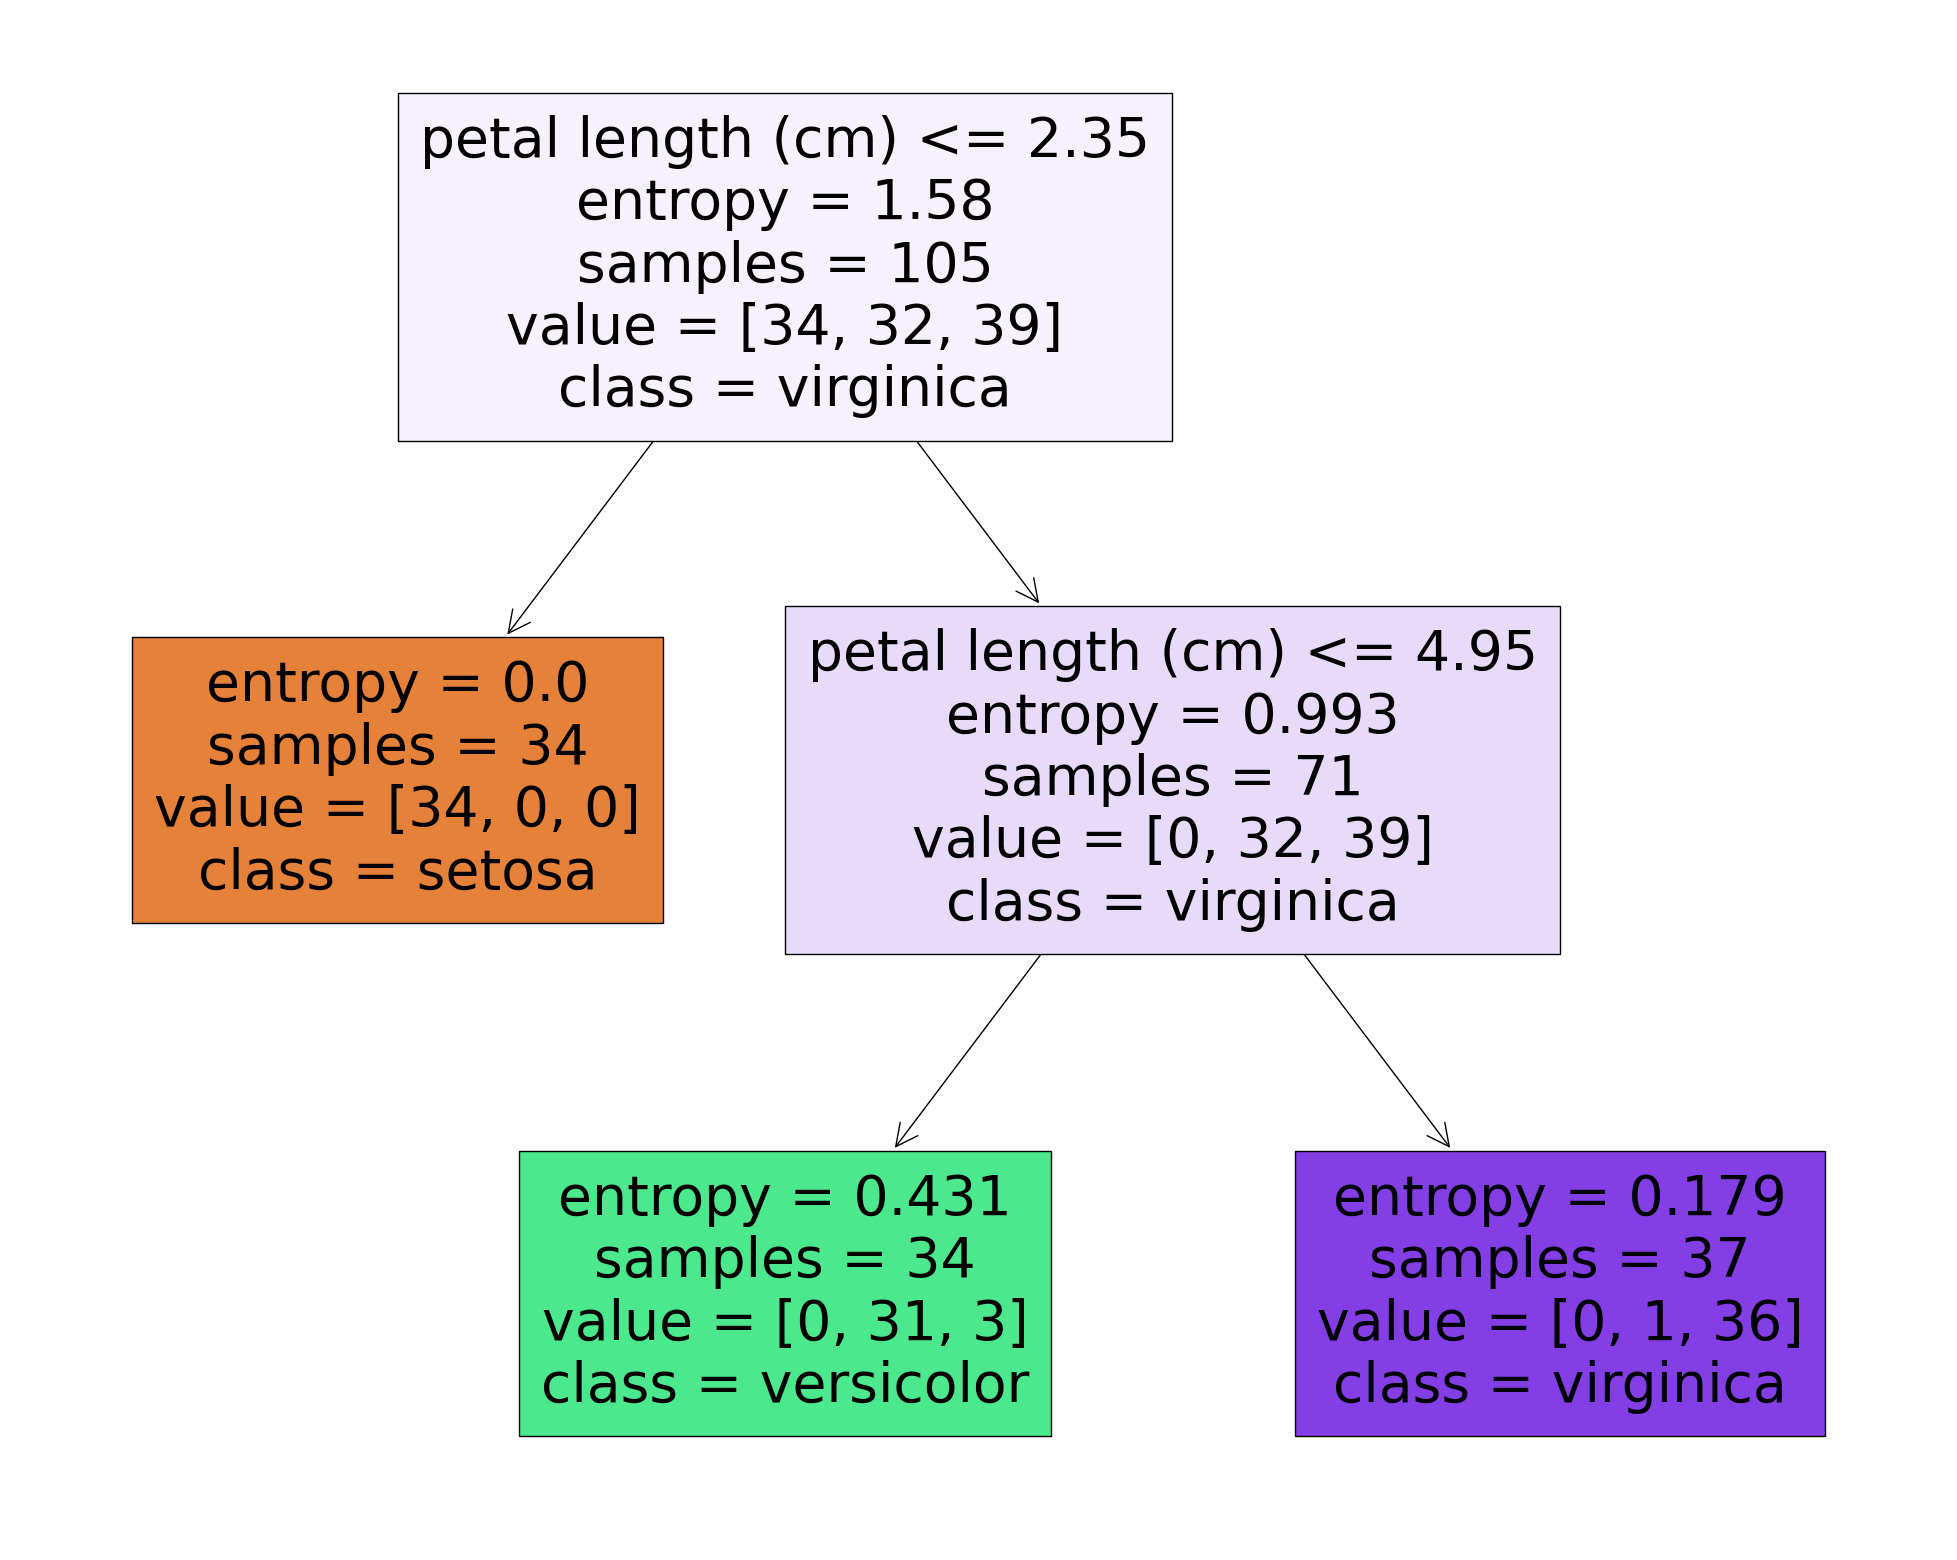

In [17]:
# 결정 트리 나무를 시각화(2단계만 시각화)
import matplotlib.pyplot as plt

plt.figure(figsize = (25,20))
# 언더 스코어(_)를 하나 주는 이유는 반환 값을 받는데 변수로 하나 받아주지 않으면 지저분하게 뭐가 찍힘.
# 반환되는 값들이, 그래서 그걸 반환되는 값을 서프레스하기 위해서 언더스코어라는 변수를 하나 줘서 받아들인거임
_ = tree.plot_tree(clf, feature_names = iris.feature_names,
                   class_names = iris.target_names, filled = True)
# filled = True --> 박스 안을 색깔로 채워라
# 훈련 데이터 105개로 훈련을 시켰는데 이 모델 처음에는 iris 종류가 세토사, 베르시콜라, 버지니카 한군데 다 모여있음
# 루트 노드에선 엔트로피가 1.58로 계산이 되었음
# 첫 번째 조건에선 Petal lenght을 기준으로 나눈다. 작으면 왼쪽, 크면 오른쪽
# 세토사 34개가 한 번에 다 왼쪽으로 분류가 되었음. 하나도 안썪이고 한 가지로 분류가 되었음
# 세토사라고 하는 종은 네 가지의 특성 하나도 볼 것 없고 petal length 만 가지고 다 분류가 됨
# 1단계 오른쪽 가지에서 또 petal length을 기준으로 물어봤음(중요한 피처 같음)
# petal length <= 2.35 && petal length <=4.95 이면 versicolor로 분류될 확률이 높음, 버지니카도 섞이긴 함.
# 화이트 박스라고 하는 이유가 있음. 명확하게 어떤 조건으로 분류가 되었는지 이유를 알 수가 있음. --> 설명 가능

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = None , criterion = "entropy") 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [20]:
accuracy_score(y_test, y_pred) #max_depth을 제한 안 했더니 정확도가 더 올라감 

0.9777777777777777

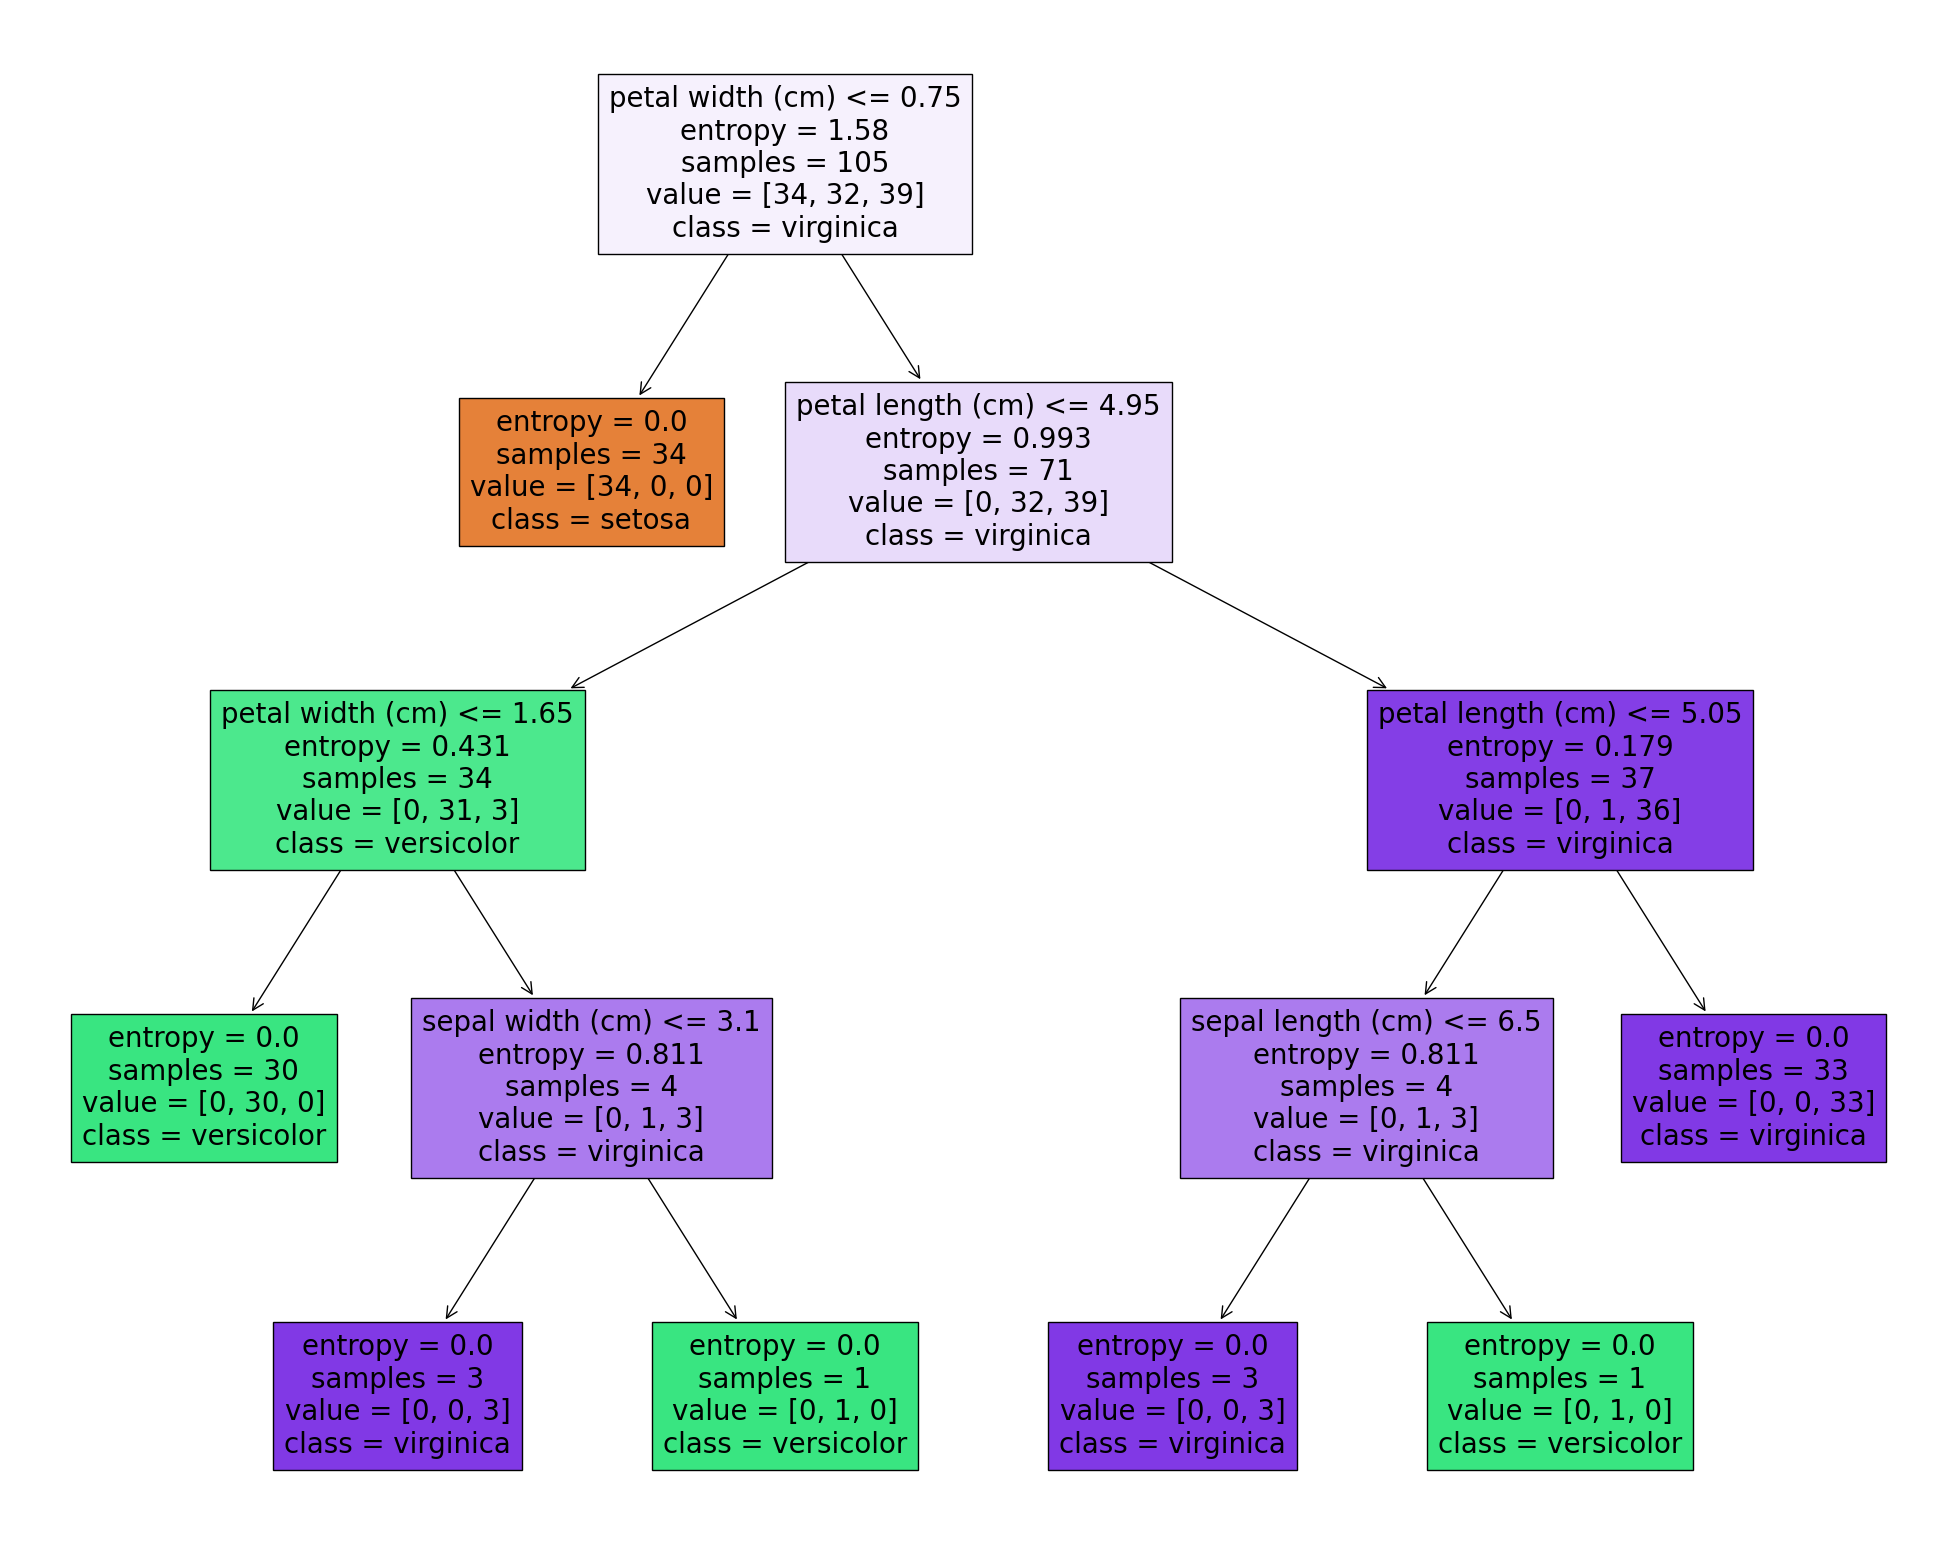

In [21]:
plt.figure(figsize = (25,20))
_ = tree.plot_tree(clf, feature_names = iris.feature_names,
                   class_names = iris.target_names, filled = True)
# 총 4개의 단계로 분류한 결정 트리, 모든 데이터를 다 분류한거